<h1>Chapter 4 | Case Study A | <b>Management Quality and Firm Size: Describing Patterns of Association</b></h1>
<p>In this notebook, I'll be taking notes of the author's code on the referred case study. The goal is to reproduce the code in the original case studies repo, visualize the distribution of the data, group quantitative values using qualitative definitions, as well as ploting stacked bar charts to visualize the resulted qualitative binning. We will be using the <code>wms-management-survey</code> dataset.</p>
<h2>1. Read the data</h2>

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [17]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = f"{dirname}da_data_repo/wms-management-survey/clean/"
data_out = f"{dirname}da_case_studies/ch04-management_firm_size/data/clean/"
output = f"{dirname}da_case_studies/ch04-management_firm_size/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"

sys.path.append(func)
func

'c:\\Users\\Felipe\\python_work\\Projects\\bk_data_analysis\\da_case_studies/ch00-tech_prep/'

In [18]:
# import the prewritten helper functions
from py_helper_functions import *

In [19]:
# Load the dataset
df = pd.read_csv(f"{data_in}wms_da_textbook.csv")

In [20]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>1.1 Sample selection</h3>
<p>Our first step is to reproduce the book's sample selection. It analyzed a cross-section of Mexican firms from the 2013 wave of the survey. The author also excluded firms with fewer than 100 employees and more than 5000 employees.</p>

In [21]:
df = df.loc[
    lambda x: (x["country"] == "Mexico") &
              (x["wave"] == 2013) &
              (x["emp_firm"] >= 100) &
              (x["emp_firm"] <= 5000)
    ]

In [22]:
df["emp_firm"].describe()

count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

<p>Perfect. We have a sample of 300 firms, with min and max sizes between the established values. We can now save our workfile so that we can work it later on.</p>

In [23]:
df.to_csv(f"{data_out}ch04-wms_workfile.csv", index=False)

<h2>2. Visualizing the distribution of management score</h2>
<p>Let's take a look at the distribution of the management score, which is a simple average of 18 score variables ranging from 1 to 5.</p>

In [26]:
df.loc[:, ["management", "emp_firm"]].describe()

,management,emp_firm
count,300.000000,300.000000
mean,2.938519,761.140000
std,0.601059,977.035685
min,1.277778,100.000000
25%,2.555556,200.000000
50%,2.944444,353.000000
75%,3.277778,900.000000
max,4.611111,5000.000000


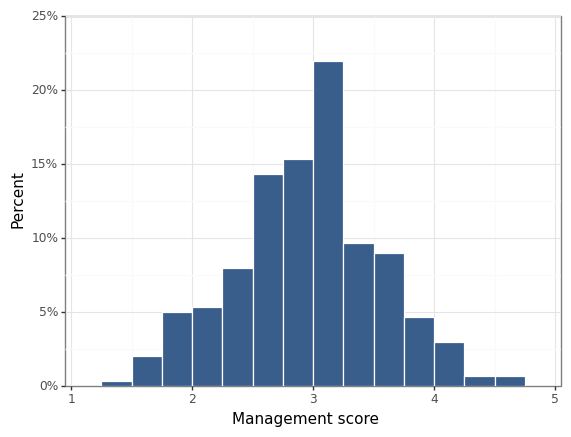

<ggplot: (140071941928)>

In [25]:
ggplot(df, aes(x="management")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0],
    color="white",
    binwidth=0.25,
    boundary=0,
    closed="left",
) + labs(x="Management score", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(1, 5)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.25),
    breaks=seq(0, 0.26, by=0.05),
    labels=percent_format()
) + theme_bw()

<p>Let's take a look at the histogram:</p>
<ul>
<li>The mean is <b>2.9</b>, while the median is also <b>2.9</b>.</li>
<li>The standard deviation is <b>0.6</b>.</li>
<li>We can tell that the mode is around <b>3.1</b>.</li>
</ul>